# Processor temperature

We have a temperature sensor in the processor of our company's server. We want to analyze the data provided to determinate whether we should change the cooling system for a better one. It is expensive and as a data analyst we cannot make decisions without a basis.

We provide the temperatures measured throughout the 24 hours of a day in a list-type data structure composed of 24 integers:
```
temperatures_C = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]
```

## Goals

1. Treatment of lists
2. Use of loop or list comprenhention
3. Calculation of the mean, minimum and maximum.
4. Filtering of lists.
5. Interpolate an outlier.
6. Logical operators.
7. Print

## Temperature graph
To facilitate understanding, the temperature graph is shown below. You do not have to do anything in this section. The test starts in **Problem**.

Text(0.5, 1.0, 'Temperatures of our server throughout the day')

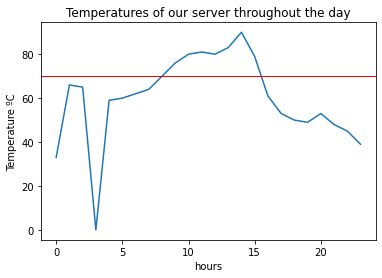

In [78]:
# import
import matplotlib.pyplot as plt
%matplotlib inline

# axis x, axis y
y = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]
x = list(range(len(y)))

# plot
plt.plot(x, y)
plt.axhline(y=70, linewidth=1, color='r')
plt.xlabel('hours')
plt.ylabel('Temperature ºC')
plt.title('Temperatures of our server throughout the day')

## Problem

If the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature above 80ºC or the average exceeds 65ºC throughout the day, we must give the order to change the cooling system to avoid damaging the processor.

We will guide you step by step so you can make the decision by calculating some intermediate steps:

1. Minimum temperature
2. Maximum temperature
3. Temperatures equal to or greater than 70ºC
4. Average temperatures throughout the day.
5. If there was a sensor failure at 03:00 and we did not capture the data, how would you estimate the value that we lack? Correct that value in the list of temperatures.
6. Bonus: Our maintenance staff is from the United States and does not understand the international metric system. Pass temperatures to Degrees Fahrenheit.

Formula: F = 1.8 * C + 32

web: https://en.wikipedia.org/wiki/Conversion_of_units_of_temperature


In [86]:
# assign a variable to the list of temperatures

# 1. Calculate the minimum of the list and print the value using print()
temp_min = min(y)
print('minimum temperature during the day is:', temp_min)

# 2. Calculate the maximum of the list and print the value using print()
temp_max = max(y)
print('maximum temperature during the day is:', temp_max)

# 3. Items in the list that are greater than 70ºC and print the result
for x in y:
    if x>70:
        print('instances of temperature exceeding above 70 degree celsius:', x)

# 4. Calculate the mean temperature throughout the day and print the result
mean_temp = sum(y)/len(y)
print('mean temperature during the day is:', mean_temp)

# 5.1 Solve the fault in the sensor by estimating a value
temp_fault = (y[2] + y[4]) / 2
print('estimated temperature during 3 oclock is:', temp_fault)

# 5.2 Update of the estimated value at 03:00 on the list
y[3] = temp_fault
print(y[3])


# Bonus: convert the list of ºC to ºFarenheit
z = []
for x in y:
    fh = x * 1.8 + 32
    z.append(fh)

mean_temp_fahrenheit= sum(z)/len(z)

print('temperatures after converting to fahrenheit are:', z)
    


minimum temperature during the day is: 33
maximum temperature during the day is: 90
instances of temperature exceeding above 70 degree celsius: 76
instances of temperature exceeding above 70 degree celsius: 80
instances of temperature exceeding above 70 degree celsius: 81
instances of temperature exceeding above 70 degree celsius: 80
instances of temperature exceeding above 70 degree celsius: 83
instances of temperature exceeding above 70 degree celsius: 90
instances of temperature exceeding above 70 degree celsius: 79
mean temperature during the day is: 62.833333333333336
estimated temperature during 3 oclock is: 62.0
62.0
145.1
temperatures after converting to fahrenheit are: [91.4, 150.8, 149.0, 143.60000000000002, 138.2, 140.0, 143.60000000000002, 147.2, 158.0, 168.8, 176.0, 177.8, 176.0, 181.4, 194.0, 174.20000000000002, 141.8, 127.4, 122.0, 120.2, 127.4, 118.4, 113.0, 102.2]


## Take the decision
Remember that if the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature higher than 80ºC or the average was higher than 65ºC throughout the day, we must give the order to change the cooling system to avoid the danger of damaging the equipment:
* more than 4 hours with temperatures greater than or equal to 70ºC
* some temperature higher than 80ºC
* average was higher than 65ºC throughout the day
If any of these three is met, the cooling system must be changed.


In [80]:
# Print True or False depending on whether you would change the cooling system or not
hour4_count = 0
for x in y:
    if x > 70:
        hour4_count += 1
if hour4_count >4:
    print('temperature exceeding safe limit for more than 4 hours a day!')
        
c80 = False
for x in y:
    if x > 80:
        c80 = True
if c80 == True:
    print('some temperatures are higher than 80C')
        
c65 = False     
z = sum(y)/len(y)
if z > 65:
    c65 = True
if c65 == True:
    print('average temperature is higher than 65C')

if hour4_count >4 or C80 == True or C65 == True:
    print ('Change of cooling system is needed!')
    
    
    

temperature exceeding safe limit for more than 4 hours a day!
some temperatures are higher than 80C
Change of cooling system is needed!


## Future improvements
1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?
3. Average of each of the lists (ºC and ºF). How they relate?
4. Standard deviation of each of the lists. How they relate?


In [81]:
# 1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
hours_exceed70 = []
x = 0
for i in y:
    if i > 70:
        hours_exceed70.append(x)
    x +=1  
print(hours_exceed70)


[9, 10, 11, 12, 13, 14, 15]


In [83]:
# 2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?
consecutive = 0
start = 0
for xx in hours_exceed70:
    if xx - start == 1:
        consecutive += 1
    else:
        consecutive = 0
    start = xx
if consecutive > 4:
    print('the consecutive numbers of hours when the CPU exceed 70 are:',consecutive)
    


the consecutive numbers of hours when the CPU exceed 70 are: 6


In [88]:
# 3. Average of each of the lists (ºC and ºF). How they relate?
relation_c_f = mean_temp / mean_temp_fahrenheit

print('The relation from Celsius to Fahrenheit is:', relation_c_f)


The relation from Celsius to Fahrenheit is: 0.4330346887204227


In [94]:
# 4. Standard deviation of each of the lists. How they relate?
import statistics
stdev_c = statistics.stdev(y)
stdev_f = statistics.stdev(z)
relation_stdev_cf = stdev_f / stdev_c

print('Standard deviation of celsius is:',stdev_c)
print('Standard deviation of fahrenheit is:',stdev_f)
print('relation from fahrenheit to celsius is:',relation_stdev_cf)




Standard deviation of celsius is: 14.94821980579356
Standard deviation of fahrenheit is: 26.906795650428407
relation from fahrenheit to celsius is: 1.8


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


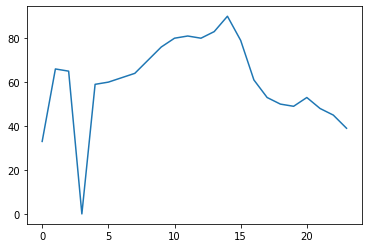